In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy.stats import binom
from scipy.stats import chi2
import seaborn as sns
from matplotlib.pyplot import rc
import scipy.stats as stats 
sns.set_theme(style="white", font_scale=1.2,palette='viridis')
font = {'weight' : 'bold', 'family':'Nimbus Sans'}
rc('font', **font) 

***Calculate the confidence interval for the ratio***

In [3]:
### Calculate confidence intervals
x1, n1 = 1, 8558   # synonymous
x2, n2 = 17, 878   # missense

# Proportions
p1 = x1 / n1
p2 = x2 / n2
RR = p2 / p1  # Relative Risk (fold difference)

# Clopper-Pearson intervals (using beta distribution)
alpha = 0.05

# Lower and upper bounds for p1
ci1_low = stats.beta.ppf(alpha / 2, x1, n1 - x1 + 1)
ci1_high = stats.beta.ppf(1 - alpha / 2, x1 + 1, n1 - x1)

# Lower and upper bounds for p2
ci2_low = stats.beta.ppf(alpha / 2, x2, n2 - x2 + 1)
ci2_high = stats.beta.ppf(1 - alpha / 2, x2 + 1, n2 - x2)

# Log-transformed CI for RR
log_rr = np.log(p2) - np.log(p1)
se_log_rr = np.sqrt((1 - p1) / (n1 * p1) + (1 - p2) / (n2 * p2))
z = stats.norm.ppf(0.975)

log_ci_low = log_rr - z * se_log_rr
log_ci_high = log_rr + z * se_log_rr

rr_ci_low = np.exp(log_ci_low)
rr_ci_high = np.exp(log_ci_high)

RR, rr_ci_low, rr_ci_high

(165.7015945330296, 22.078374283894615, 1243.6159509632716)

***Plot likelihood surface***

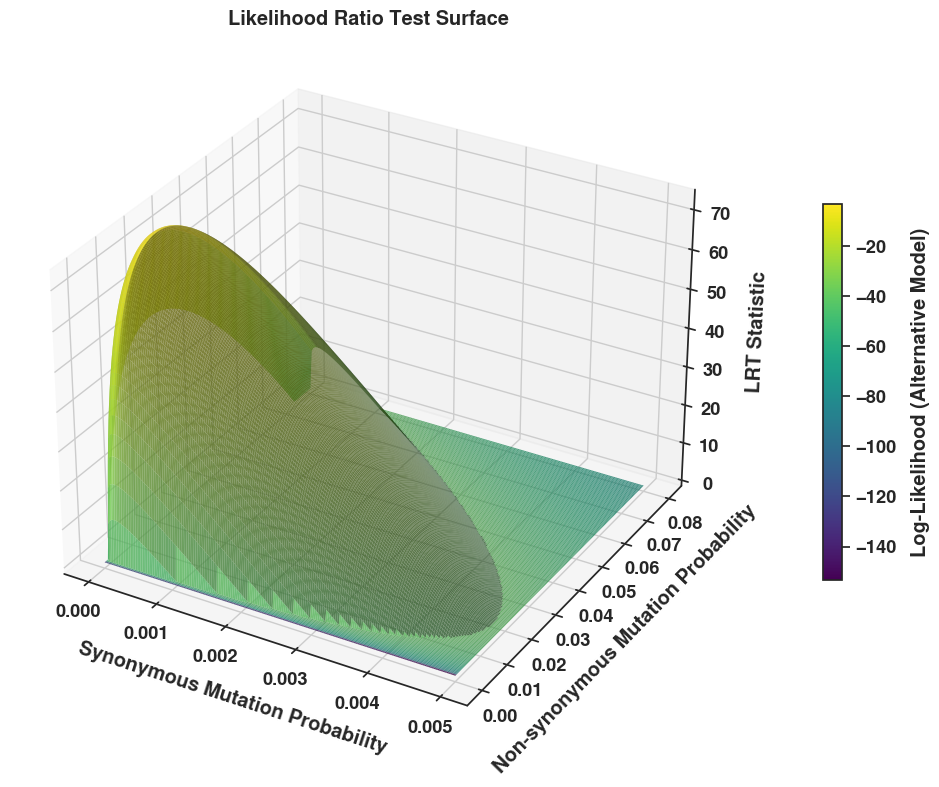

In [8]:
# Input data
N_syn = 8558
N_non_syn = 878
X_syn = 1 
X_non_syn = 17  

# MLE estimates
p_syn_mle = X_syn / N_syn
p_non_syn_mle = X_non_syn / N_non_syn
p_null = (X_syn + X_non_syn) / (N_syn + N_non_syn)

# Null log-likelihood (scalar)
log_likelihood_null = (
    binom.logpmf(X_syn, N_syn, p_null) +
    binom.logpmf(X_non_syn, N_non_syn, p_null)
)

# Parameter grid
p_syn = np.linspace(0.000000001, 0.005, 200) 
p_non_syn = np.linspace(0.00001, 0.08, 200) 
P_syn, P_non_syn = np.meshgrid(p_syn, p_non_syn)

# Compute log-likelihood surface (alternative model)
logL_syn = binom.logpmf(X_syn, N_syn, P_syn)
logL_non_syn = binom.logpmf(X_non_syn, N_non_syn, P_non_syn)
logL_combined = logL_syn + logL_non_syn

# Compute LRT surface
LRT_surface = 2 * (logL_combined - log_likelihood_null)

# Clip any extremely negative values (optional visual improvement)
LRT_surface = np.maximum(LRT_surface, 0)

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface color by log-likelihood (you can choose logL_combined or LRT_surface)
surf = ax.plot_surface(P_syn, P_non_syn, LRT_surface, 
                       facecolors=plt.cm.viridis((logL_combined - logL_combined.min()) / 
                                                 (logL_combined.max() - logL_combined.min())),
                       rstride=1, cstride=1, linewidth=0, antialiased=True, alpha=0.8)

# Colorbar for likelihood
m = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
m.set_array(logL_combined)
cbar = plt.colorbar(m, pad=0.1, shrink=0.5)
cbar.set_label('Log-Likelihood (Alternative Model)', fontweight='bold', labelpad=10)

# Axis labels
ax.set_xlabel('Synonymous Mutation Probability', fontweight='bold', labelpad=10)
ax.set_ylabel('Non-synonymous Mutation Probability', fontweight='bold', labelpad=10)
ax.set_zlabel('LRT Statistic', fontweight='bold', labelpad=10)
ax.set_title('Likelihood Ratio Test Surface', fontweight='bold')

# Save and show
plt.tight_layout()
# plt.savefig('./processed/LRT_surface_plot.png', dpi=300, transparent=True)
plt.show()

In [ ]:
# Input data for putative mutation number
N_syn = 8558
N_non_syn = 878
X_syn = 1 
X_non_syn = 17  

p_syn_mle = X_syn / N_syn  # MLE for synonymous
p_non_syn_mle = X_non_syn / N_non_syn  # MLE for non-synonymous

p_null = (X_syn + X_non_syn) / (N_syn + N_non_syn) 

log_likelihood_null = (
    binom.logpmf(X_syn, N_syn, p_null) + binom.logpmf(X_non_syn, N_non_syn, p_null)
)
log_likelihood_alternative = (
    binom.logpmf(X_syn, N_syn, p_syn_mle) + binom.logpmf(X_non_syn, N_non_syn, p_non_syn_mle)
)
lrt_statistic = 2 * (log_likelihood_alternative - log_likelihood_null)
df = 1
p_value = chi2.sf(lrt_statistic, df)

print(lrt_statistic, p_value)

73.50605129676129 1.0032810946226703e-17
